**The Sparks Foundation #GRIPMAY24**


Author: **MOHAMED YASIN, Data Science and Business Analytics Intern**

**Task 6: Prediction Using Decision Tree Algorithm (Intermediate Level)**

**Problem Statement:** Create a Decision Tree Algorithm which would able to give the correct prediction according to the feed data and Visualize it.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

**Loading the dataset from sns Library & make it as a Dataframe**

In [2]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Exploratory Data Analysis**

**Reading the Data(DataFrame) from the Dataset**

In [3]:
df = pd.DataFrame(data)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Shape of the DataFrame**

In [4]:
df.shape

(150, 5)

**Available Columns in the DataFrame**

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Statistical value of the columns**

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Describe the Data type of the Columns**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Unique values in each Columns**

In [8]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

**Count of Species and its NAME**

In [9]:
print(df.species.nunique())
print(df.species.value_counts())

3
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


**Finding missing values**

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**label encoding for categorical column(Species)**

In [11]:
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Find correlation between the columns**

In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


**Using Pair plot, visualize the correlation**

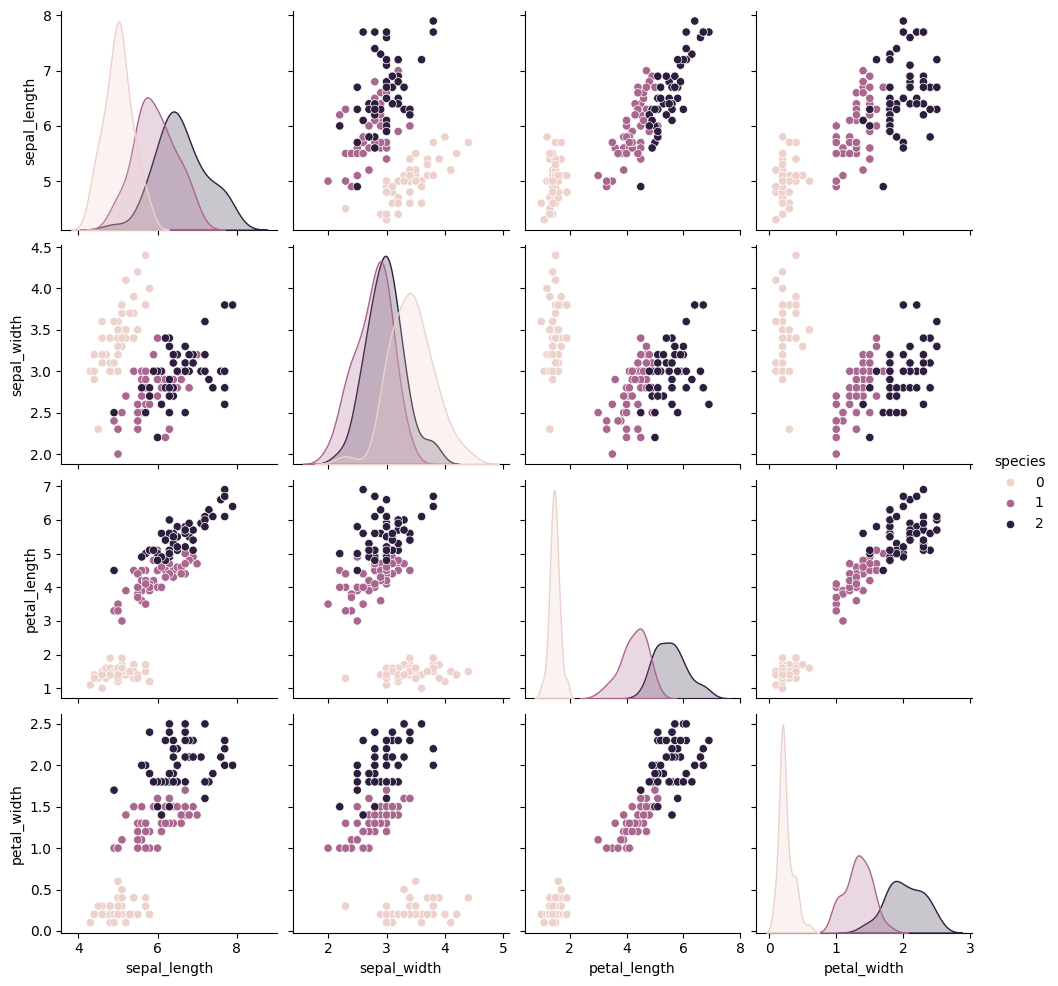

In [13]:
sns.pairplot(data=df,hue='species')

**Defining attributes as dependent and Independent Variables**

In [14]:
X = df.iloc[:, [0,1,2,3]].values
y = df["species"].values

**Train the existing data**

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
print("Training data shape",X_train.shape)
print("Testing data shape",X_test.shape)
print("Training data created")

Training data shape (120, 4)
Testing data shape (30, 4)
Training data created


**Implement Decision tree classifier and fit the trained data into it**

In [16]:
DTree_classifier = DecisionTreeClassifier()
DTree_classifier.fit(X_train,y_train)
print('Trained the data using Decision Tree Classifier')

Trained the data using Decision Tree Classifier


**Applying predict function and get the predicted values for test Data**

In [17]:
y_predicted = DTree_classifier.predict(X_test)
print("y_predicted value is calculated using x_test value")

y_predicted value is calculated using x_test value


**Compare actual and predicted data by the model**

In [18]:
df0 = pd.DataFrame({'y_Actual':y_test,'y_Predicted':y_predicted})
df0.head()

,y_Actual,y_Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


**Accuracy**

In [19]:
print('Accuracy score between y_test and y_predicted is:',accuracy_score(y_test,y_predicted))

Accuracy score between y_test and y_predicted is: 1.0


**Confusion Matrix**

In [20]:
print("Confusion matrix for y_test and y_predicted is:\n", confusion_matrix(y_test,y_predicted))

Confusion matrix for y_test and y_predicted is:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Classification report**

In [21]:
print('Classification report \n:',classification_report(y_test,y_predicted))

Classification report 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**using matplotlib, plot a Decision tree by using feature names and class names**

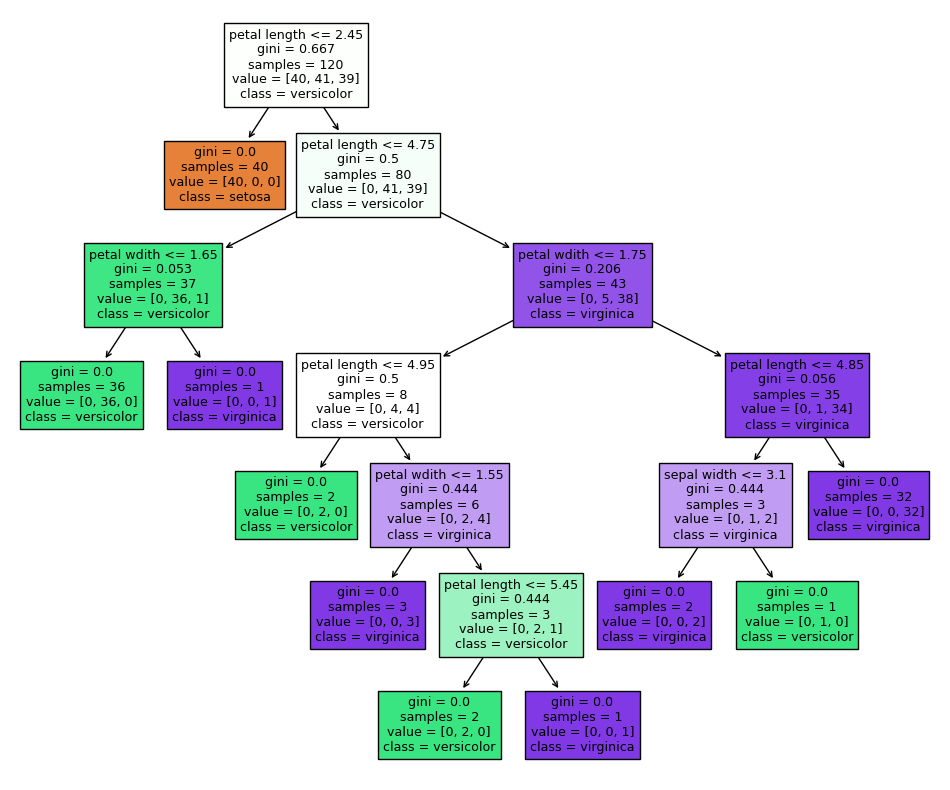

In [22]:
plt.figure(figsize=(12,10))
feature = ['sepal length','sepal width','petal length','petal wdith']
cl_name = ['setosa','versicolor','virginica']
tree.plot_tree(DTree_classifier,feature_names=feature,class_names=cl_name,filled=True);
plt.show()

**Test values**

In [32]:
test_point = [[5.1, 3.1, 4.3, 2.3],
              [3.2, 3.5, 4.1, 2.3],
              [5.1, 3.5, 1.4, 0.2]]


**Predicted output for the test values**

In [33]:
print(DTree_classifier.predict(test_point))

[2 2 0]
